ari_tsne=0.8857921001989628, silhouette_tsne=0.6340027
ari_lda=0.9222414299226981, silhouette_lda=0.6482776950499557
Log-Likelihood (LDA): -3.7025907472173185
Log-Likelihood (t-SNE): -4.470521119028876


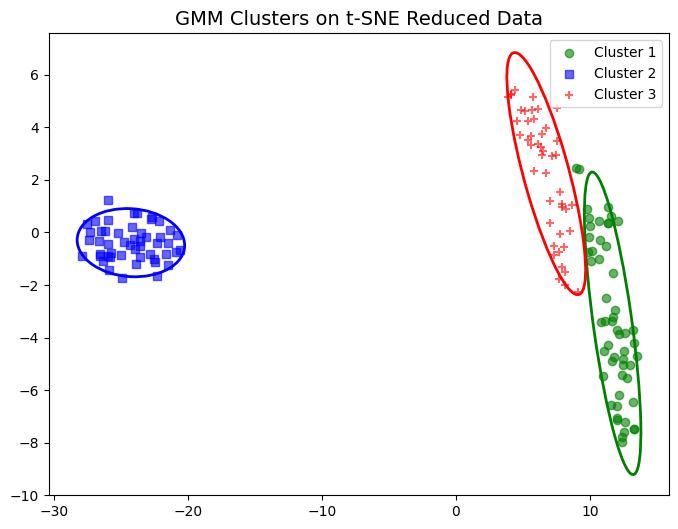

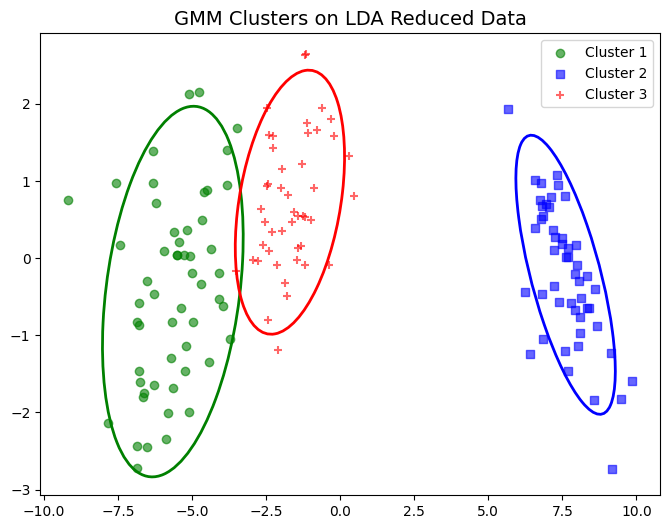

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from sklearn.mixture import GaussianMixture


X, y = datasets.load_iris(return_X_y=True)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

gmm_tsne = GaussianMixture(n_components=3, random_state=42)
y_pred_tsne = gmm_tsne.fit_predict(X_tsne)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

gmm_lda = GaussianMixture(n_components=3, random_state=42)
y_pred_lda = gmm_lda.fit_predict(X_lda)


ari_tsne = adjusted_rand_score(y, y_pred_tsne)
silhouette_tsne = silhouette_score(X_tsne, y_pred_tsne)


ari_lda = adjusted_rand_score(y, y_pred_lda)
silhouette_lda = silhouette_score(X_lda, y_pred_lda)


def plot_gmm_clusters(X_transformed, y_pred, gmm_model, title):
    plt.figure(figsize=(8, 6))
    colors = ["green", "blue", "red"]
    markers = ["o", "s", "+"]

    for i in range(3):
        cluster_points = X_transformed[y_pred == i]
        plt.scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            color=colors[i],
            marker=markers[i],
            label=f"Cluster {i + 1}",
            alpha=0.6,
        )

        mean = gmm_model.means_[i]
        cov = gmm_model.covariances_[i]
        eigvals, eigvecs = np.linalg.eigh(cov)
        angle = np.degrees(np.arctan2(eigvecs[0, 1], eigvecs[0, 0]))
        width, height = 2 * 2 * np.sqrt(eigvals)  # 2-sigma (95% confidence ellipse)
        ellipse = Ellipse(
            mean,
            width,
            height,
            angle=angle,
            edgecolor=colors[i],
            facecolor="none",
            linewidth=2,
        )
        plt.gca().add_patch(ellipse)

    plt.title(title, fontsize=14)
    plt.legend()
    plt.show()


print(f"{ari_tsne=}, {silhouette_tsne=}")
print(f"{ari_lda=}, {silhouette_lda=}")


log_likelihood_lda = gmm_lda.score(X_lda)
log_likelihood_tsne = gmm_tsne.score(X_tsne)
print(f"Log-Likelihood (LDA): {log_likelihood_lda}")
print(f"Log-Likelihood (t-SNE): {log_likelihood_tsne}")


plot_gmm_clusters(X_tsne, y_pred_tsne, gmm_tsne, "GMM Clusters on t-SNE Reduced Data")

plot_gmm_clusters(X_lda, y_pred_lda, gmm_lda, "GMM Clusters on LDA Reduced Data")
